In [3]:
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
# форматирование для просмотра всех столбцов датафрейма и float с 3-мя
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:,.3f}'.format

%config InlineBackend.figure_format='svg'
%matplotlib inline

# Hometask #3

## Задание 1

1) Загрузим данные

In [5]:
data = pd.read_stata('boston.zip', index_col=None)
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.006,18.000,2.310,0,0.538,6.575,65.200,4.090,1,296,15.300,396.900,4.980,24.000
1,0.027,0.000,7.070,0,0.469,6.421,78.900,4.967,2,242,17.800,396.900,9.140,21.600
2,0.027,0.000,7.070,0,0.469,7.185,61.100,4.967,2,242,17.800,392.830,4.030,34.700
3,0.032,0.000,2.180,0,0.458,6.998,45.800,6.062,3,222,18.700,394.630,2.940,33.400
4,0.069,0.000,2.180,0,0.458,7.147,54.200,6.062,3,222,18.700,396.900,5.330,36.200


Признаки:
- CRIM     per capita crime rate by town / Уровень криминальности по уровню города
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft./ Доля жилой земли для участка свыше 25 тыс. кв.фунтов
- INDUS    proportion of non-retail business acres per town
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX      nitric oxides concentration (parts per 10 million)
- RM       average number of rooms per dwelling
- AGE      proportion of owner-occupied units built prior to 1940
- DIS      weighted distances to five Boston employment centres
- RAD      index of accessibility to radial highways
- TAX      full-value property-tax rate per $10,000

- PTRATIO  pupil-teacher ratio by town
- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT    % lower status of the population
- MEDV     Median value of owner-occupied homes in $1000's

In [6]:
# Поделим на два датсетс
y = pd.DataFrame({'price':data['medv']}, index=None)
X = data.drop('medv', axis=1).copy()

2) разделим выборку на тренировочную и тестовую

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [9]:
X_train.shape, X_test.shape

((354, 13), (152, 13))

3. Загрузим модель линейной регрессии и сделаем пресказание

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
liner = LinearRegression()

In [12]:
liner.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = liner.predict(X_test)

## Задание 2

In [14]:
from sklearn.ensemble import RandomForestRegressor

In [15]:
frst_regr = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42) 

In [16]:
frst_regr.fit(X_train, y_train.values[:,0])

RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

In [17]:
y_pred_fr = frst_regr.predict(X_test)

In [18]:
from sklearn.metrics import r2_score

In [19]:
r2_fr = r2_score(y_test, y_pred_fr)
r2_fr

0.87472606157312

In [20]:
r2_liner = r2_score(y_test, y_pred)
r2_liner

0.7112260057484939

`Итог` 
По метрике R2 предсказание у модели "Ансамбль дервеьев" лучше, чем у модели "Линейной регрессии".

## Задание 3

In [21]:
# ?RandomForestRegressor

In [22]:
feats_import = pd.Series(frst_regr.feature_importances_, index=X_train.columns, name='features_importances')
feats_import

crim      0.032
zn        0.002
indus     0.007
chas      0.001
nox       0.014
rm        0.403
age       0.014
dis       0.064
rad       0.005
tax       0.012
ptratio   0.018
black     0.012
lstat     0.416
Name: features_importances, dtype: float64

In [23]:
# 
feats_import.sum()

1.0

У признаков сильный разброс значений, поэтому для 


In [24]:
plt.rcParams['figure.figsize'] = 6,4

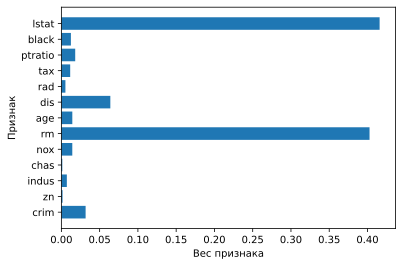

In [25]:
plt.barh(feats_import.index, feats_import.values)
plt.xlabel('Вес признака')
plt.ylabel('Признак');

`Итог`
в распределении весового значения признаков при определении средней стоимости жилья значительно преобладают два:
* lstat - процент населения с низким статусом,
* rm - количество комнат на жилую площадь

## Задание 4

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [27]:
df = pd.read_stata('creditcard.zip', index_col=None)

#### Выборка несбалансирована
`мошеннические` транзакции занимают около `1.7%`

In [28]:
df['Class'].value_counts(normalize=True)

Class
0   0.998
1   0.002
Name: proportion, dtype: float64

#### Просмотр данных
* Пропущенные значения отсутствуют
* Все данные представлены в формате float64, кроме целевого признака

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [30]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,0.091,-0.552,-0.618,-0.991,-0.311,1.468,-0.470,0.208,0.026,0.404,0.251,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.620,0
1,0.000,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,-0.167,1.613,1.065,0.489,-0.144,0.636,0.464,-0.115,-0.183,-0.146,-0.069,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.690,0
2,1.000,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,0.208,0.625,0.066,0.717,-0.166,2.346,-2.890,1.110,-0.121,-2.262,0.525,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.660,0
3,1.000,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,-0.055,-0.226,0.178,0.508,-0.288,-0.631,-1.060,-0.684,1.966,-1.233,-0.208,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.500,0
4,2.000,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,0.753,-0.823,0.538,1.346,-1.120,0.175,-0.451,-0.237,-0.038,0.803,0.409,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.990,0
5,2.000,-0.426,0.961,1.141,-0.168,0.421,-0.030,0.476,0.260,-0.569,-0.371,1.341,0.360,-0.358,-0.137,0.518,0.402,-0.058,0.069,-0.033,0.085,-0.208,-0.560,-0.026,-0.371,-0.233,0.106,0.254,0.081,3.670,0
6,4.000,1.230,0.141,0.045,1.203,0.192,0.273,-0.005,0.081,0.465,-0.099,-1.417,-0.154,-0.751,0.167,0.050,-0.444,0.003,-0.612,-0.046,-0.220,-0.168,-0.271,-0.154,-0.780,0.750,-0.257,0.035,0.005,4.990,0
7,7.000,-0.644,1.418,1.074,-0.492,0.949,0.428,1.121,-3.808,0.615,1.249,-0.619,0.291,1.758,-1.324,0.686,-0.076,-1.222,-0.358,0.325,-0.157,1.943,-1.015,0.058,-0.650,-0.415,-0.052,-1.207,-1.085,40.800,0
8,7.000,-0.894,0.286,-0.113,-0.272,2.670,3.722,0.370,0.851,-0.392,-0.410,-0.705,-0.110,-0.286,0.074,-0.329,-0.210,-0.500,0.119,0.570,0.053,-0.073,-0.268,-0.204,1.012,0.373,-0.384,0.012,0.142,93.200,0
9,9.000,-0.338,1.120,1.044,-0.222,0.499,-0.247,0.652,0.070,-0.737,-0.367,1.018,0.836,1.007,-0.444,0.150,0.739,-0.541,0.477,0.452,0.204,-0.247,-0.634,-0.121,-0.385,-0.070,0.094,0.246,0.083,3.680,0


#### Разделим данные, отделив целевой признак

In [31]:
X = df.drop('Class', axis=1).copy()
y = pd.Series(df['Class'], name='Class')

#### Поделим выборку на тренировочную и тестовую

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=100, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((199364, 30), (85443, 30), (199364,), (85443,))

#### Для подбора наилучших параметров, воспользуемся методом поиска по сетке от sklearn 
зададим сетку параметров

In [33]:
parameters = {'n_estimators':[10,15],
              'max_features': np.arange(3,5),
              'max_depth': np.arange(4,7)}

* В качестве estimators модели используем `Ансамбль деревьев`,
* Метрика - `ROC-AUC`,
* Количество folds /`cv` - 3 

In [34]:
classifier = GridSearchCV(estimator=RandomForestClassifier(random_state=100),
                         param_grid=parameters,
                         scoring='roc_auc',
                         cv=3)

In [35]:
classifier.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=100),
             param_grid={'max_depth': array([4, 5, 6]),
                         'max_features': array([3, 4]),
                         'n_estimators': [10, 15]},
             scoring='roc_auc')

In [36]:
best_params = classifier.best_params_
best_params

{'max_depth': 6, 'max_features': 3, 'n_estimators': 15}

Обучим модельс полученными параметрами

In [37]:
cls = RandomForestClassifier(max_depth=best_params['max_depth'], 
                             max_features=best_params['max_features'], 
                             n_estimators=best_params['n_estimators'])

In [38]:
cls.fit(X_train , y_train)

RandomForestClassifier(max_depth=6, max_features=3, n_estimators=15)

* Получим `вероятность` принадлежности к классу "1" с помощью метода predict_proba 

In [39]:
y_pred_proba = cls.predict_proba(X_test)[:,1]

* Вычислим таргет по тренировочным данным

In [40]:
y_pred = cls.predict(X_train)

Сравним результаты с помощью метрики `ROC AUC`

In [41]:
from sklearn.metrics import roc_auc_score

In [42]:
roc_auc = roc_auc_score(y_test, y_pred_proba)
roc_auc

0.9479018763179617

In [43]:
roc_auc_train = roc_auc_score(y_train, y_pred)
roc_auc_train

0.8822573926191829

In [66]:
print('ИТОГ: точность предсказания выше на', 'тестовых данных' if roc_auc > roc_auc_train else 'тренировочных данных')

ИТОГ: точность предсказания выше на тестовых данных


## Дополнительные задания
1. Загрузим датасет

In [44]:
from sklearn.datasets import load_wine

2. Просмотрим атрибуты датасета и ключи

In [45]:
data = load_wine()
data_keys = data.keys()
data_keys

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

3. Посмотрим описание, оставим нужную нам информацию в зоне видимости

In [46]:
print(data['DESCR'][70:1600])

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3
Total Phenols:                0.98  3.88    2.29  0.63
Flavanoids:   

In [47]:
data['target_names']

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

4. Из описания видим следующие характеристики:
* Целевая переменная принимает 3 значения: 'class_0', 'class_1', 'class_2'
* 13 признаков
* нет пропущенных значений в данных
* все признаки содержат числовые значения

In [48]:
pd.options.display.multi_sparse

True

5. Создадим датафрейм `X`

In [49]:
X = pd.DataFrame(data['data'], columns=data['feature_names'])
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.230,1.710,2.430,15.600,127.000,2.800,3.060,0.280,2.290,5.640,1.040,3.920,"1,065.000"
1,13.200,1.780,2.140,11.200,100.000,2.650,2.760,0.260,1.280,4.380,1.050,3.400,"1,050.000"
2,13.160,2.360,2.670,18.600,101.000,2.800,3.240,0.300,2.810,5.680,1.030,3.170,"1,185.000"
3,14.370,1.950,2.500,16.800,113.000,3.850,3.490,0.240,2.180,7.800,0.860,3.450,"1,480.000"
4,13.240,2.590,2.870,21.000,118.000,2.800,2.690,0.390,1.820,4.320,1.040,2.930,735.000


6. Видим, что в полученном датафрейм `нет пропущенных значений` и размер датасета: `178 строк и 13 колонок`, вкллючая индекс

In [50]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

7. Добавим в выборку целевой признак и изменим тип данных полученного столбца

In [51]:
X['target'] = data['target']
X.sample(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
1,13.200,1.780,2.140,11.200,100.000,2.650,2.760,0.260,1.280,4.380,1.050,3.400,"1,050.000",0
77,11.840,2.890,2.230,18.000,112.000,1.720,1.320,0.430,0.950,2.650,0.960,2.520,500.000,1
103,11.820,1.720,1.880,19.500,86.000,2.500,1.640,0.370,1.420,2.060,0.940,2.440,415.000,1
124,11.870,4.310,2.390,21.000,82.000,2.860,3.030,0.210,2.910,2.800,0.750,3.640,380.000,1
81,12.720,1.810,2.200,18.800,86.000,2.200,2.530,0.260,1.770,3.900,1.160,3.140,714.000,1


In [52]:
X['target'].astype(np.int64)

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int64

### 8. Построим матрицу корреляций

In [53]:
X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000
mean,13.001,2.336,2.367,19.495,99.742,2.295,2.029,0.362,1.591,5.058,0.957,2.612,746.893,0.938
std,0.812,1.117,0.274,3.340,14.282,0.626,0.999,0.124,0.572,2.318,0.229,0.710,314.907,0.775
min,11.030,0.740,1.360,10.600,70.000,0.980,0.340,0.130,0.410,1.280,0.480,1.270,278.000,0.000
25%,12.362,1.603,2.210,17.200,88.000,1.742,1.205,0.270,1.250,3.220,0.782,1.938,500.500,0.000
50%,13.050,1.865,2.360,19.500,98.000,2.355,2.135,0.340,1.555,4.690,0.965,2.780,673.500,1.000
75%,13.678,3.083,2.558,21.500,107.000,2.800,2.875,0.438,1.950,6.200,1.120,3.170,985.000,2.000
max,14.830,5.800,3.230,30.000,162.000,3.880,5.080,0.660,3.580,13.000,1.710,4.000,"1,680.000",2.000


In [54]:
X[:5]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.230,1.710,2.430,15.600,127.000,2.800,3.060,0.280,2.290,5.640,1.040,3.920,"1,065.000",0
1,13.200,1.780,2.140,11.200,100.000,2.650,2.760,0.260,1.280,4.380,1.050,3.400,"1,050.000",0
2,13.160,2.360,2.670,18.600,101.000,2.800,3.240,0.300,2.810,5.680,1.030,3.170,"1,185.000",0
3,14.370,1.950,2.500,16.800,113.000,3.850,3.490,0.240,2.180,7.800,0.860,3.450,"1,480.000",0
4,13.240,2.590,2.870,21.000,118.000,2.800,2.690,0.390,1.820,4.320,1.040,2.930,735.000,0


In [55]:
import seaborn as sns

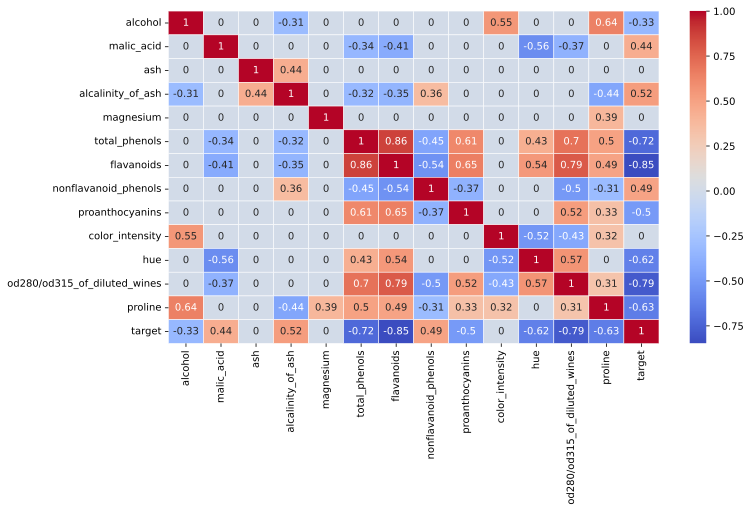

In [56]:
plt.figure(figsize=(11,6))

X_corr = X.corr()  # построим матрицу
X_corr[np.abs(X_corr) < 0.3] = 0  # значения меньше 0.3 "обнулим"

sns.heatmap(X_corr, annot=True, linewidth=0.5, cmap='coolwarm', fmt='.2g')
sns.set(font_scale=0.8)
plt.show();

* В списке `high_corr` сохраним признаки, который выше лимита в `0,4`

In [57]:
limit = 0.4
high_corr = X_corr[X_corr['target'] > limit].drop('target', axis=0)
high_corr = np.array(high_corr.index)
print(high_corr)

['malic_acid' 'alcalinity_of_ash' 'nonflavanoid_phenols']


In [58]:
X.drop('target', axis=1, inplace=True)
X[:5]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.230,1.710,2.430,15.600,127.000,2.800,3.060,0.280,2.290,5.640,1.040,3.920,"1,065.000"
1,13.200,1.780,2.140,11.200,100.000,2.650,2.760,0.260,1.280,4.380,1.050,3.400,"1,050.000"
2,13.160,2.360,2.670,18.600,101.000,2.800,3.240,0.300,2.810,5.680,1.030,3.170,"1,185.000"
3,14.370,1.950,2.500,16.800,113.000,3.850,3.490,0.240,2.180,7.800,0.860,3.450,"1,480.000"
4,13.240,2.590,2.870,21.000,118.000,2.800,2.690,0.390,1.820,4.320,1.040,2.930,735.000


* В датафрейм X внесём продублируем признаки, указанные с списке high_corr, со значениями возведёнными `в квадрат` и обознаим новые столбцы окончаем `"_2"`

In [59]:
for i in high_corr:
    X[i+'_2'] = X[i]**2
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,malic_acid_2,alcalinity_of_ash_2,nonflavanoid_phenols_2
0,14.230,1.710,2.430,15.600,127.000,2.800,3.060,0.280,2.290,5.640,1.040,3.920,"1,065.000",2.924,243.360,0.078
1,13.200,1.780,2.140,11.200,100.000,2.650,2.760,0.260,1.280,4.380,1.050,3.400,"1,050.000",3.168,125.440,0.068
2,13.160,2.360,2.670,18.600,101.000,2.800,3.240,0.300,2.810,5.680,1.030,3.170,"1,185.000",5.570,345.960,0.090
3,14.370,1.950,2.500,16.800,113.000,3.850,3.490,0.240,2.180,7.800,0.860,3.450,"1,480.000",3.802,282.240,0.058
4,13.240,2.590,2.870,21.000,118.000,2.800,2.690,0.390,1.820,4.320,1.040,2.930,735.000,6.708,441.000,0.152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.710,5.650,2.450,20.500,95.000,1.680,0.610,0.520,1.060,7.700,0.640,1.740,740.000,31.923,420.250,0.270
174,13.400,3.910,2.480,23.000,102.000,1.800,0.750,0.430,1.410,7.300,0.700,1.560,750.000,15.288,529.000,0.185
175,13.270,4.280,2.260,20.000,120.000,1.590,0.690,0.430,1.350,10.200,0.590,1.560,835.000,18.318,400.000,0.185
176,13.170,2.590,2.370,20.000,120.000,1.650,0.680,0.530,1.460,9.300,0.600,1.620,840.000,6.708,400.000,0.281


In [60]:
X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,malic_acid_2,alcalinity_of_ash_2,nonflavanoid_phenols_2
count,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000,178.000
mean,13.001,2.336,2.367,19.495,99.742,2.295,2.029,0.362,1.591,5.058,0.957,2.612,746.893,6.700,391.143,0.146
std,0.812,1.117,0.274,3.340,14.282,0.626,0.999,0.124,0.572,2.318,0.229,0.710,314.907,6.644,133.672,0.098
min,11.030,0.740,1.360,10.600,70.000,0.980,0.340,0.130,0.410,1.280,0.480,1.270,278.000,0.548,112.360,0.017
25%,12.362,1.603,2.210,17.200,88.000,1.742,1.205,0.270,1.250,3.220,0.782,1.938,500.500,2.568,295.840,0.073
50%,13.050,1.865,2.360,19.500,98.000,2.355,2.135,0.340,1.555,4.690,0.965,2.780,673.500,3.478,380.250,0.116
75%,13.678,3.083,2.558,21.500,107.000,2.800,2.875,0.438,1.950,6.200,1.120,3.170,985.000,9.503,462.250,0.191
max,14.830,5.800,3.230,30.000,162.000,3.880,5.080,0.660,3.580,13.000,1.710,4.000,"1,680.000",33.640,900.000,0.436
